# Example code to read the reduced MIGHTI-IVM equator-crossing dataset

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xarray as xr

plt.style.use('seaborn')


C:\Users\pkoll\AppData\Local\Temp\ipykernel_6896\3077268909.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
dsm = xr.open_dataset('eqcross_mv05iv06_r00_mti_2021 (1).nc')
dsi = xr.open_dataset('eqcross_mv05iv06_r00_ivm_2021.nc')

C:\Users\pkoll\anaconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
dsm

<xarray.Dataset>
Dimensions:    (num: 7594, dt: 33, alt: 84)
Coordinates:
  * alt        (alt) float64 88.38 91.33 94.28 97.21 ... 297.7 300.0 302.3 304.6
  * dt         (dt) float64 -480.0 -450.0 -420.0 -390.0 ... 420.0 450.0 480.0
  * num        (num) int64 0 1 2 3 4 5 6 ... 7587 7588 7589 7590 7591 7592 7593
Data variables: (12/17)
    u          (num, dt, alt) float64 ...
    v          (num, dt, alt) float64 ...
    lon        (num, dt) float64 ...
    lat        (num, dt) float64 ...
    u_error    (num, dt, alt) float64 ...
    v_error    (num, dt, alt) float64 ...
    ...         ...
    sza        (num, dt) float64 ...
    slt        (num, dt) float64 ...
    asc        (num, dt) float64 ...
    dt_actual  (num, alt, dt) float64 ...
    t_temp     (num, alt, dt) float64 ...
    time       (num, dt) datetime64[ns] ...

<IPython.core.display.Javascript object>


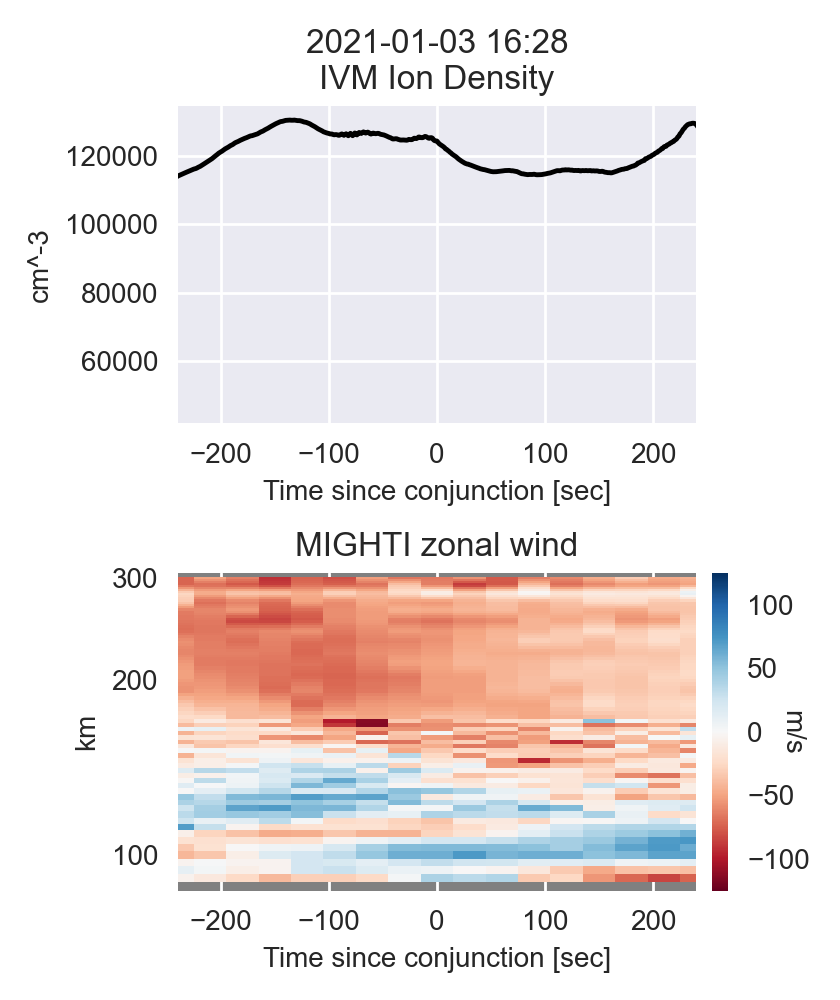

In [5]:
num = 42

dsmi = dsm.sel(num=num)
dsii = dsi.sel(num=num)

csize = '3%' # For adding colorbar
cpad = 0.08  # For adding colorbar
clabelpad = -2
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(4.2,5))

plt.subplot(2,1,1)
plt.plot(dsii.dt, dsii.ni, 'k-')
plt.xlim(-240, 240)
plt.ylabel('cm^-3')
plt.xlabel('Time since conjunction [sec]')
plt.title('%s\nIVM Ion Density' % (pd.to_datetime(dsii.time.sel(dt=0).item()).strftime('%Y-%m-%d %H:%M')))
cax = make_axes_locatable(plt.gca()).append_axes('right', size=csize, pad=cpad)
cax.set_visible(False) # Helps alignment

plt.subplot(2,1,2)
h = plt.pcolormesh(dsmi.dt, dsmi.alt, dsmi.u.T, vmin=-125, vmax=125, cmap='RdBu')
plt.gca().set_facecolor('gray')
plt.xlabel('Time since conjunction [sec]')
plt.xlim(-240, 240)
plt.yscale('log')
plt.yticks([100,200,300],['100','200','300'])
plt.ylabel('km')
plt.title('MIGHTI zonal wind')
cax = make_axes_locatable(plt.gca()).append_axes('right', size=csize, pad=cpad)
plt.gcf().colorbar(h, cax=cax).set_label('m/s',rotation=-90,labelpad=clabelpad)

plt.tight_layout()